In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('/Users/avinashtelagamsetti/Desktop/HW 2 Data Mining/red_wine.csv')
profile = ProfileReport(df, title='Red Wine Data Report')
profile.to_file("/Users/avinashtelagamsetti/Desktop/HW 2 Data Mining/red_wine_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 62.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

import pandas as pd

# Load red wine data
df = pd.read_csv('/Users/avinashtelagamsetti/Desktop/HW 2 Data Mining/red_wine.csv')

# Print to confirm
print(df.head())
print(df['type'].unique())  # should show ['high', 'low']

# Define features (X) and label (y)
X = df.drop('type', axis=1)
y = df['type'].map({'low': 0, 'high': 1})  # converts target to 0 and 1

print(X.head())
print(y.head())


# Define models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Cross-validation
results = {}
cv = StratifiedKFold(n_splits=10)

for name, model in models.items():
    auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    results[name] = {'AUC': auc, 'Accuracy': accuracy}

results_df = pd.DataFrame(results).T
print(results_df)

   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low
['low' 'high']
   citric acid  sulphates  alcohol
0         0.49       0.63      8.0
1         0.66       0.57      8.3
2         0.23       0.44      8.5
3         0.44       0.84      8.6
4         0.08       0.50      8.7
0    0
1    0
2    1
3    0
4    0
Name: type, dtype: int64
                          AUC  Accuracy
Baseline             0.500000  0.528887
Logistic Regression  0.879902  0.784785
Naive Bayes          0.895408  0.821627
Decision Tree        0.754824  0.737477
SVM-Linear           0.881489  0.793587
SVM-RBF              0.868920  0.535844
Random Forest        0.893750  0.795312


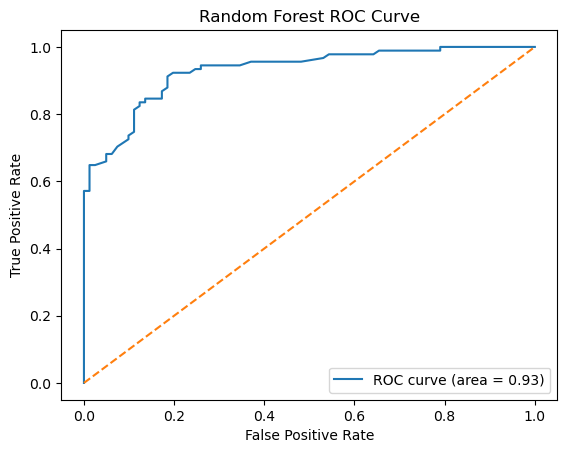

In [13]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load red wine dataset
df_red = pd.read_csv('/Users/avinashtelagamsetti/Desktop/HW 2 Data Mining/red_wine.csv')
X_red = df_red.drop('type', axis=1)
y_red = df_red['type'].map({'low': 0, 'high': 1})

# Load white wine dataset
df_white = pd.read_csv('/Users/avinashtelagamsetti/Desktop/HW 2 Data Mining/white_wine.csv')
X_white = df_white.drop('type', axis=1)
y_white = df_white['type'].map({'low': 0, 'high': 1})

# Train Naive Bayes model on red wine
nb_model = GaussianNB()
nb_model.fit(X_red, y_red)

# Predict probabilities on white wine
y_white_pred_proba = nb_model.predict_proba(X_white)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_white, y_white_pred_proba)
print("Naive Bayes AUC on White Wine Dataset:", round(auc_score, 4))

Naive Bayes AUC on White Wine Dataset: 0.9489
